# Building an Agent with LangGraph and Azure OpenAI: A Complete Guide

## Introduction

This tutorial will guide you through building an intelligent ordering system called BaristaBot using LangGraph and Azure OpenAI. The system will:
- Provide a natural language interface for cafe orders
- Maintain conversation state
- Handle complex order modifications
- Integrate with a menu system
- Process and validate orders

### Why LangGraph?

LangGraph is a powerful framework for building stateful, graph-based applications powered by language models. Key advantages include:
- Clear separation of concerns through nodes and edges
- Built-in state management
- Flexible routing between components
- Support for both synchronous and streaming operations
- Integration with various LLM providers

## Understanding LangGraph
LangGraph is a framework that helps you build applications with language models using a graph-based approach. Think of it like building blocks where each block has a specific job and they're connected in specific ways.

### Key Concepts


1. **Graphs**:  At its heart, LangGraph uses graphs. A graph is like a flowchart that shows how different parts of your application connect and work together.

2. **State**:  LangGraph keeps track of information as it moves through your application. This is called "state" and it's like a memory that holds things like:
   - The conversation history
   - Any important variables
   - The current status of the application

3. **Nodes**:  These are the building blocks of your application. Each node is like a worker that has a specific job. For example:
   - One node might talk to the language model
   - Another node might get input from the user
   - Another might update a database
   
   Python functions that encode the logic of your agents. They receive the current `State` as input, perform some computation or side-effect, and return an updated `State`.

4. **Edges**: These connect the nodes together and show how information flows between them. They determine things like:
   - What happens next after each step
   - When to stop or continue
   - Which path to take based on certain conditions

By composing `Nodes` and `Edges`, you can create complex, looping workflows that evolve the `State` over time. The real power, though, comes from how LangGraph manages that `State`. To emphasize: `Nodes` and `Edges` are nothing more than Python functions - they can contain an LLM or just good ol' Python code.

In short: `nodes` do the work. `edges` tell what to do next.

To start, install the LangGraph package:
```bash
%pip install langgraph
```

Let me show you a very simple example to illustrate these concepts:


In [9]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

# 1. First, we define what information we want to track (State)
class SimpleState(TypedDict):
    message: str  # Just tracking a single message for now
    
# 2. Create a simple node that processes messages
def message_processor(state: SimpleState) -> SimpleState:
    """A simple node that adds 'Processed: ' to messages"""
    return {"message": f"Processed: {state['message']}"}

# 3. Build the graph
graph = StateGraph(SimpleState)
graph.add_node("processor", message_processor)  # Add our node
graph.add_edge(START, "processor")  # Connect start to our node
graph.add_edge("processor", END)    # Connect our node to end

simple_graph = graph.compile() # Compile the graph


It can be helpful to visualise the graph you just defined. The following code renders the graph.

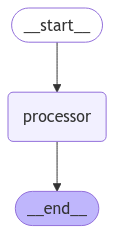

In [12]:
from IPython.display import Image, display

Image(simple_graph.get_graph().draw_mermaid_png())

## Setup and Installation

Requirements:
```bash
pip install langchain-openai
pip install azure-openai
```
### Configuration
Create a  `.env` file:

```python
AZURE_OPENAI_ENDPOINT="your_azure_endpoint"
AZURE_OPENAI_API_KEY="your_api_key"
OPENAI_API_VERSION="your_api_version"
```

In [15]:
from dotenv import load_dotenv
import os
from langchain_openai import AzureOpenAI

load_dotenv()

llm = AzureOpenAI(
    azure_deployment='gpt-4o',
    api_version=os.getenv("OPENAI_API_VERSION"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    api_key=os.getenv("AZURE_OPENAI_KEY"),
    temperature=0.7,
    max_retries=3,
)


## Core Concepts